In [58]:
import numpy as np
import pandas as pd

In [59]:
df=pd.read_csv("C://Users//whs38//OneDrive//바탕 화면//archive//airquality.csv")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [61]:
Ozone_mean=np.mean(df["Ozone"])
Ozone_mean

42.12931034482759

In [62]:
df["Ozone"].fillna(0,inplace=True)

In [63]:
Ozone_mean2=np.mean(df["Ozone"])
Ozone_mean2

31.941176470588236

In [64]:
print(Ozone_mean-Ozone_mean2)

10.188133874239352


In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
df1=df
scaler=MinMaxScaler()
df1["Wind"]=scaler.fit_transform(df1[["Wind"]])
minmax_mean=np.mean(df1["Wind"])
minmax_mean

0.4346061231510148

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
standard=StandardScaler()

In [69]:
df2=df
df2["Wind"]=standard.fit_transform(df2[["Wind"]])
standard_mean=np.mean(df2["Wind"])
standard_mean

4.8363636987756e-16

In [70]:
print(df.groupby("Month")["Temp"].mean())

Month
5    65.548387
6    79.100000
7    83.903226
8    83.967742
9    76.900000
Name: Temp, dtype: float64


In [71]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

In [89]:
df=pd.read_csv("C://Users//whs38//OneDrive//바탕 화면//archive//Bank_Personal_Loan_Modelling.csv")

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [91]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [92]:
x=df.drop(["Personal Loan","ID","ZIP Code"],axis=1)
y=df["Personal Loan"]

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [93]:
from sklearn.preprocessing import Normalizer

Normal=Normalizer()

In [95]:
x_train=Normal.fit_transform(x_train)

x_test=Normal.transform(x_test)

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

training_accuracy=[]
test_accuracy=[]

neighbors_settings=range(1,25)

for n_neighbors in neighbors_settings:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    
    training_accuracy.append(knn.score(x_train,y_train))
    
    test_accuracy.append(knn.score(x_test,y_test))

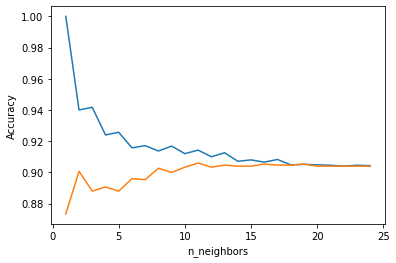

In [100]:
import matplotlib.pyplot as plt
plt.plot(neighbors_settings,training_accuracy,label="Training Accuracy")

plt.plot(neighbors_settings,test_accuracy,label="Test Accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show()

In [101]:
test_accuracy

[0.8733333333333333,
 0.9006666666666666,
 0.888,
 0.8906666666666667,
 0.888,
 0.896,
 0.8953333333333333,
 0.9026666666666666,
 0.9,
 0.9033333333333333,
 0.906,
 0.9033333333333333,
 0.9046666666666666,
 0.904,
 0.904,
 0.9053333333333333,
 0.9046666666666666,
 0.9046666666666666,
 0.9053333333333333,
 0.904,
 0.904,
 0.904,
 0.904,
 0.904]

In [103]:
knn.score(x_test,y_test)

0.904

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of